In [11]:
%load_ext autoreload
%autoreload 2

from src.models.gps import GPS
from src.models.gcn import GCN
from src.models.explainer.explainer_pipeline import ExplainerPipeline
from src.models.explainer.gnn_explainer import GNNExplainer
from src.data import loader

import networkx as nx

from torch_geometric.explain import ModelConfig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The node_mask and edge_mask attributes filter out nodes and edges belonging to motifs.

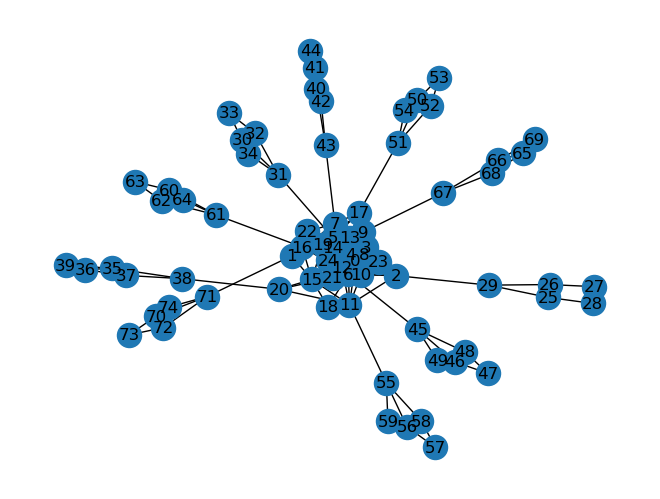

In [12]:
data, num_classes, data_networkx = loader.load_clean_bashapes(num_nodes=25, num_edges=5, num_motifs=10, laplacian_eigenvector_dimensions=2)
nx.draw(data_networkx, with_labels=True)

In [13]:
gps_params = {
    'pe_channels': 2,
    'num_layers': 4,
    'hidden_channels': 4,
    'num_attention_heads': 1,
    'observe_attention': True
}

gcn_params = {
    "hidden_channels": 20,
    "num_layers": 3
}

explainer_params = {
    'explanation_type': 'model',
    'node_mask_type': 'attributes',
    'edge_mask_type': 'object',
    'model_config': ModelConfig(
        mode='multiclass_classification',
        task_level='node',
        return_type='raw',
    )
}

explainer_pipeline = ExplainerPipeline(data, num_classes, GCN, GNNExplainer, model_params=gcn_params, explainer_params=explainer_params, epochs=4000)
explainer_pipeline.get_accuracies()

100%|██████████| 4000/4000 [00:08<00:00, 469.80it/s]

Train accuracy: 0.7333333333333333
Test accuracy: 0.7333333333333333


In [14]:
explainer_pipeline.explain(26)

100%|██████████| 100/100 [00:00<00:00, 221.23it/s]


In [15]:
data.edge_index

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
          2,  2,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
          5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
          6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
          8,  8,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 11, 11,
         11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13,
         13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16,
         16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20,
         20, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24,
         25, 25, 25, 26, 26, 26, 27, 27, 28, 28, 29, 29,  2, 29, 30, 30, 30, 31,
         31, 31, 32, 32, 33, 33, 34, 34,  5, 31, 35, 35, 35, 36, 36, 36, 37, 37,
         38, 38, 39, 39, 20, 38, 40, 40, 40, 41, 41, 41, 42, 42, 43, 43, 44, 44,
          7, 43, 45, 45, 45,

In [16]:
explanation = explainer_pipeline.explanations[26]
explanation.edge_mask

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

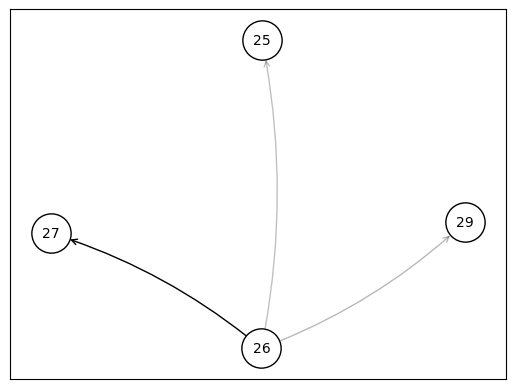

In [17]:
explanation.visualize_graph()

In [ ]:
# how to get the weights

gps = GPS(data, num_classes, **gps_params)
hook = GPSHook(gps)
train(gps, data, epochs=2)
hook.remove_hooks()
hook.attention_weights